In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df = pd.read_csv("C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Copper_Set.csv")

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
#Checking unique value counts in each column
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16318
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [7]:
#Check data types
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
#Converting object data type to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Converting float to datetime
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce')

# Converting float to datetime
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d',errors='coerce')

In [9]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [10]:
#Replacing '00000' with NaN in Material_Ref column
df.loc[df['material_ref'].astype(str).str.startswith('00000'), 'material_ref'] = np.nan
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [11]:
#Check for null values
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77955
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:
#Drop columns 'id'(unique values) and 'material_ref'(more than 50% null values)
df.drop(columns=['id','material_ref'], inplace=True)
df.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33


In [13]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181670,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,181670,1.816720e+05
mean,2020-11-26 22:56:58.127374080,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2021-01-25 22:44:26.223372032,1.918036e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,NaN,3.317956e+05


In [14]:
#Columns 'quantity tons and selling price' has negative values 
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181670,1.816680e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,181670,1.816650e+05
mean,2020-11-26 22:56:58.127374080,5.875066e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2021-01-25 22:44:26.223372032,1.918124e+03
min,2020-07-02 00:00:00,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,1.000000e-01
25%,2020-09-29 00:00:00,1.097122e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036501e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716134e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349107e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,NaN,3.318020e+05


In [15]:
# check null values for all columns
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [16]:
#handle null values - mode values
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)

#fill null with mean values 
df['item_date'].fillna(df['item_date'].mean(), inplace=True)  
df['delivery date'].fillna(df['delivery date'].mean(), inplace=True)
df['quantity tons'].fillna(df['quantity tons'].mean(), inplace=True)
df['customer'].fillna(df['customer'].mean(), inplace=True)
df['country'].fillna(df['country'].mean(), inplace=True)
df['application'].fillna(df['application'].mean(), inplace=True)
df['thickness'].fillna(df['thickness'].mean(), inplace=True)
df['width'].fillna(df['width'].mean(), inplace=True)
df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)

In [17]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

### Visualization

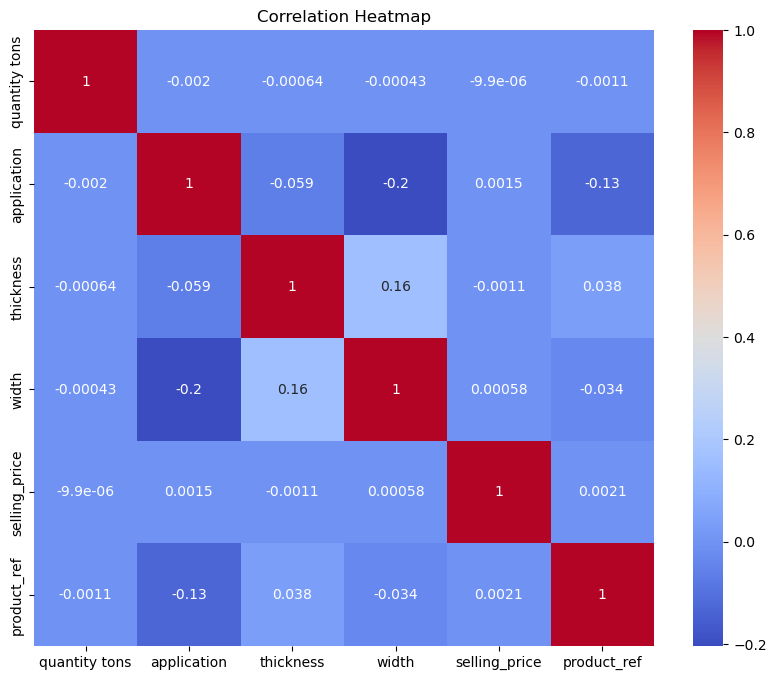

In [18]:
#Finding highly correlated columns using SNS Heatmap
x=df[['quantity tons','application','thickness','width','selling_price','product_ref']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(x, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
#Visualizing Outliers and Skewness
def plot(df, column):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

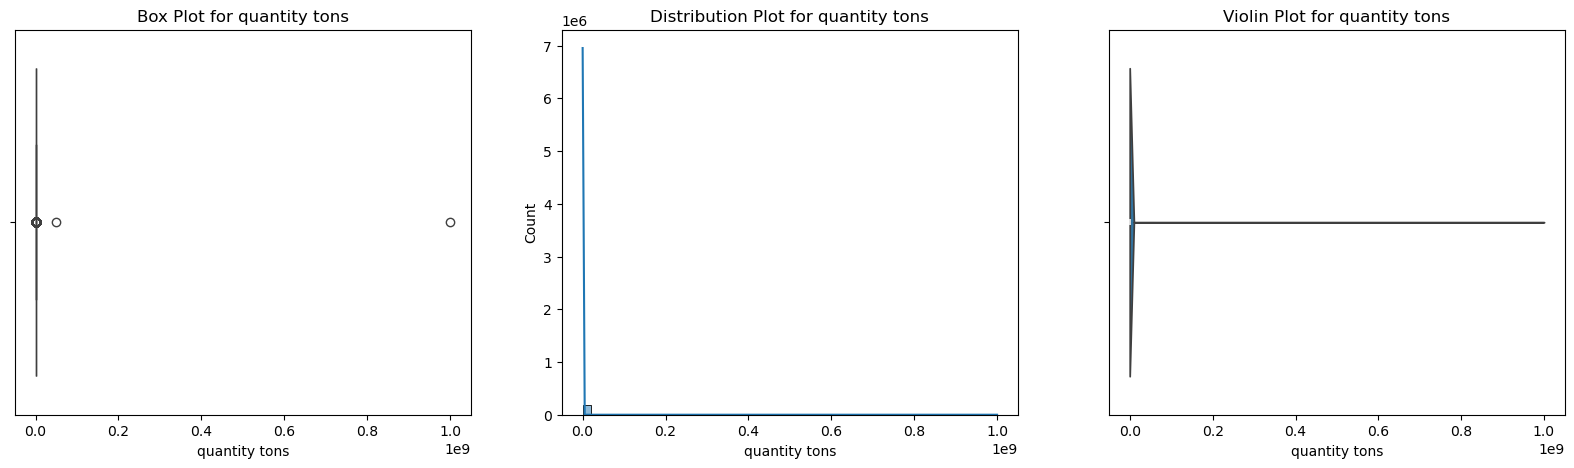

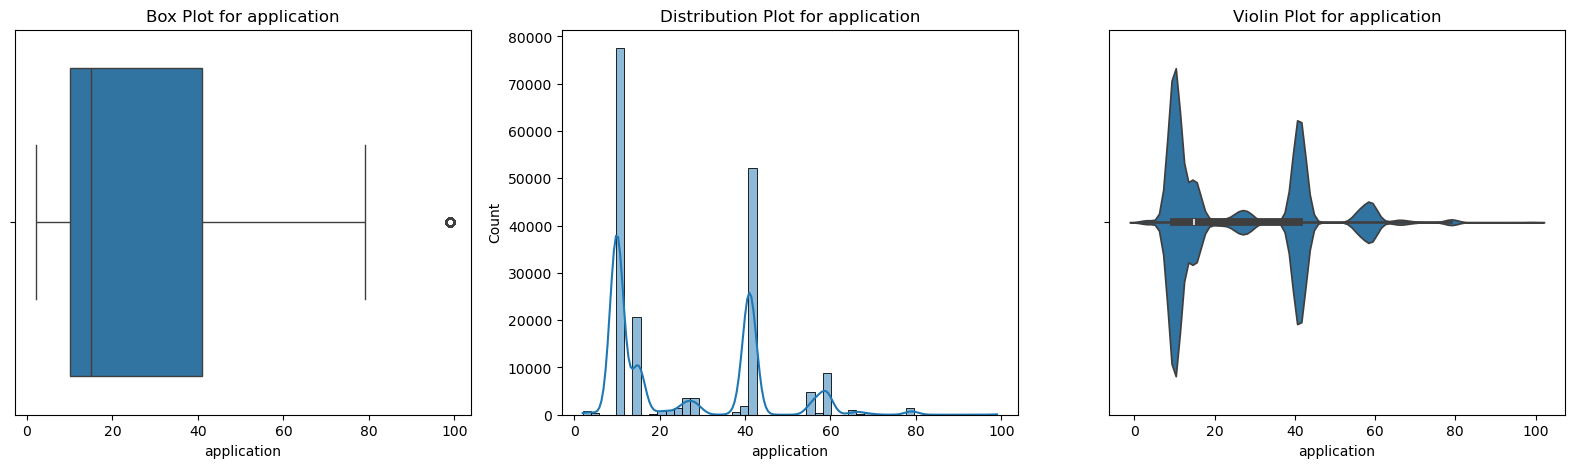

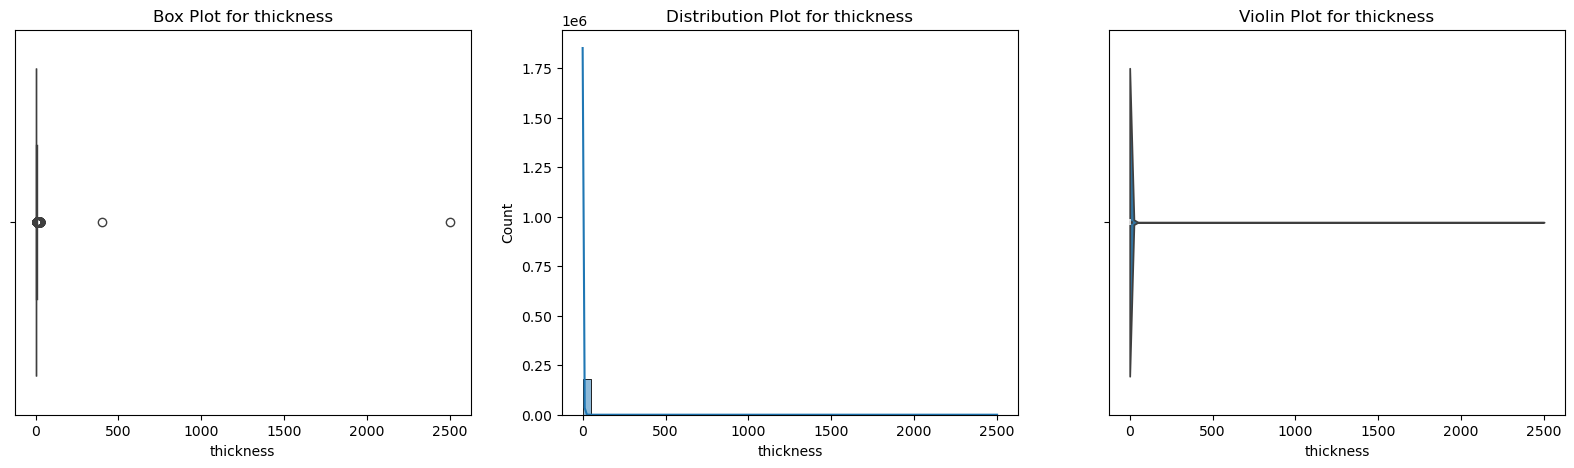

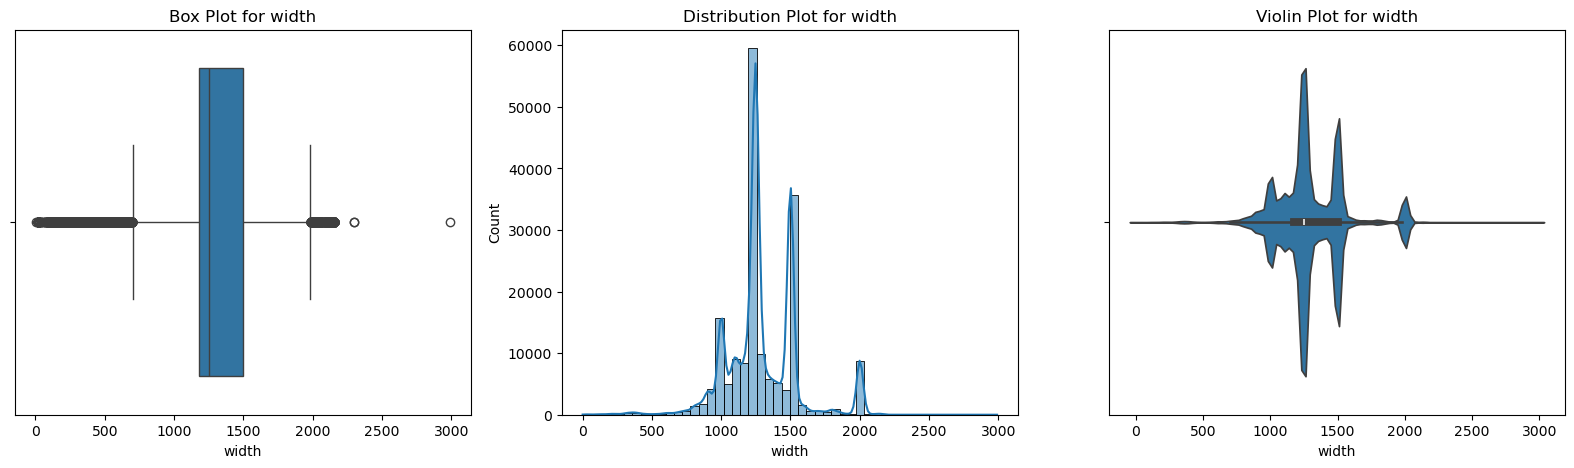

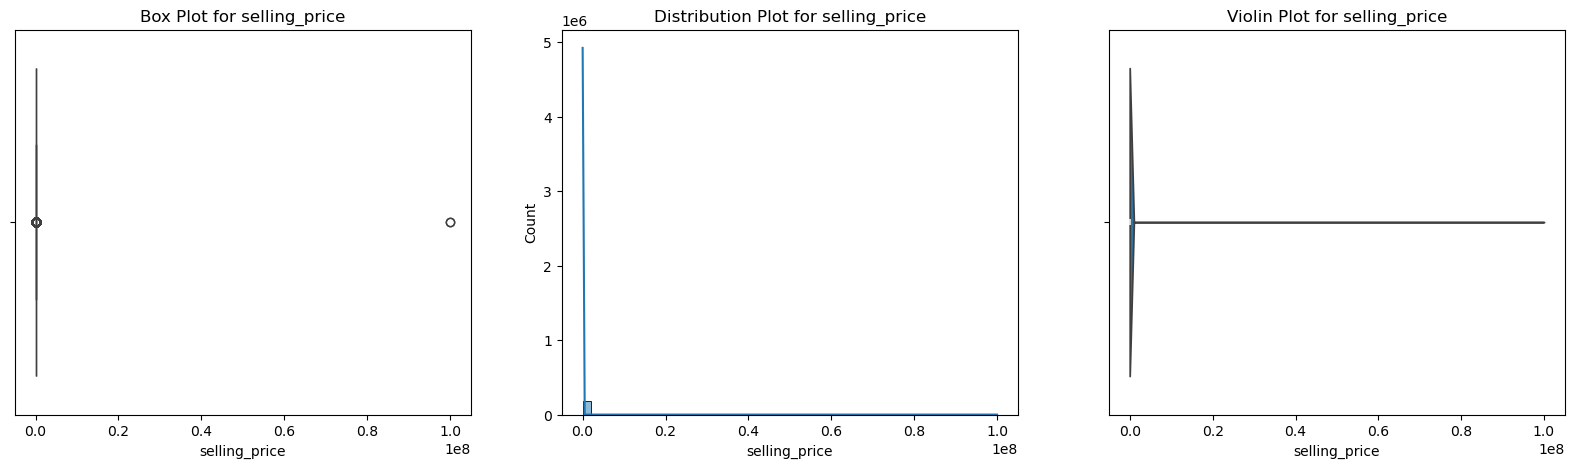

In [20]:
columns_to_plot = ['quantity tons', 'application', 'thickness', 'width', 'selling_price']
for column in columns_to_plot:
    plot(df, column)
     

In [21]:
#Handle skewness in columns - quantity tons, thickness and selling_price
df_new = df.copy()
df_new

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,5875.066247,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [22]:
#Log transformation to treat skewness
df_new['quantity_tons_log'] = np.log1p(df_new['quantity tons'])
df_new['thickness_log'] = np.log1p(df_new['thickness'])
df_new['selling_price_log'] = np.log1p(df_new['selling_price'])
df_new

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,0.672944,6.383507
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,0.667829,6.380123
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,0.536493,6.429719
181671,2020-07-02,5875.066247,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,8.678643,0.615186,6.400257


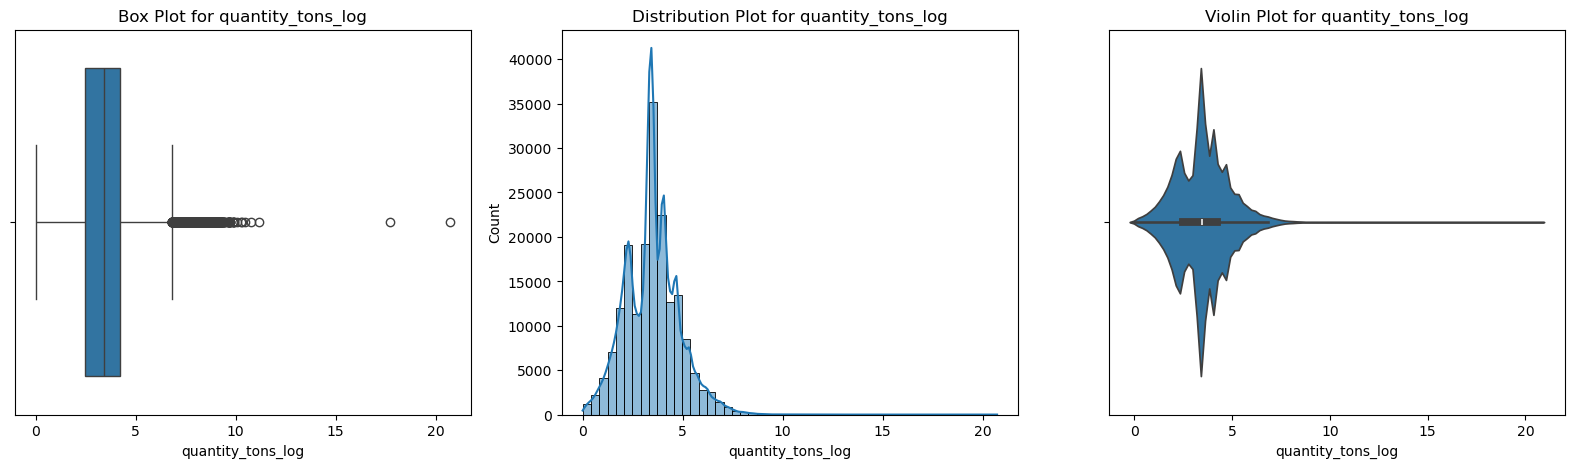

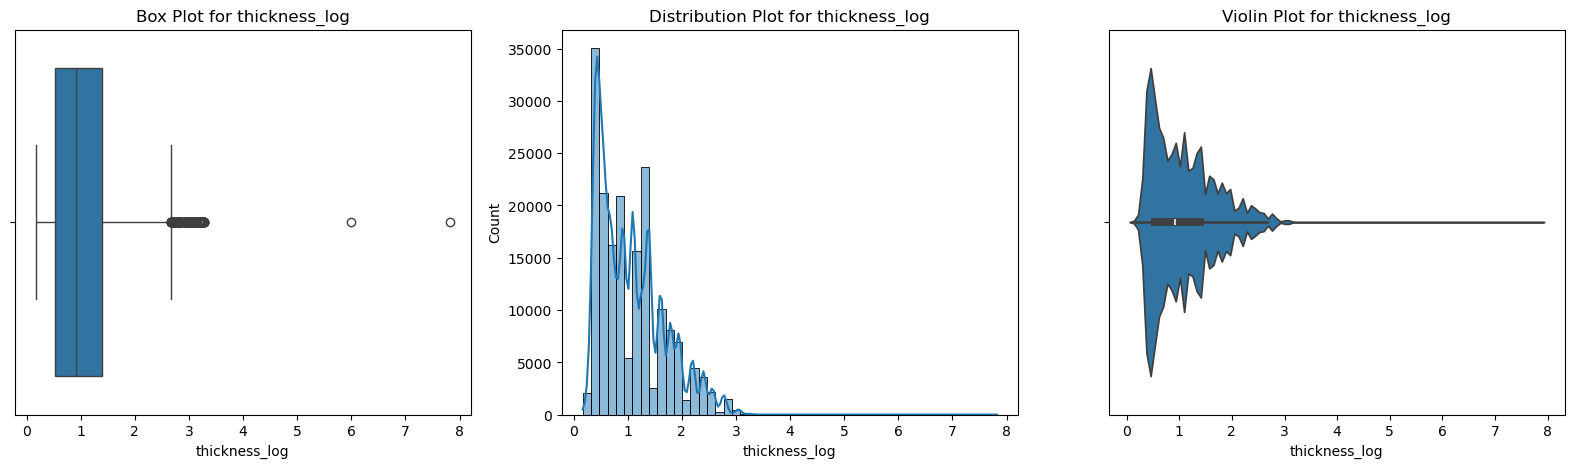

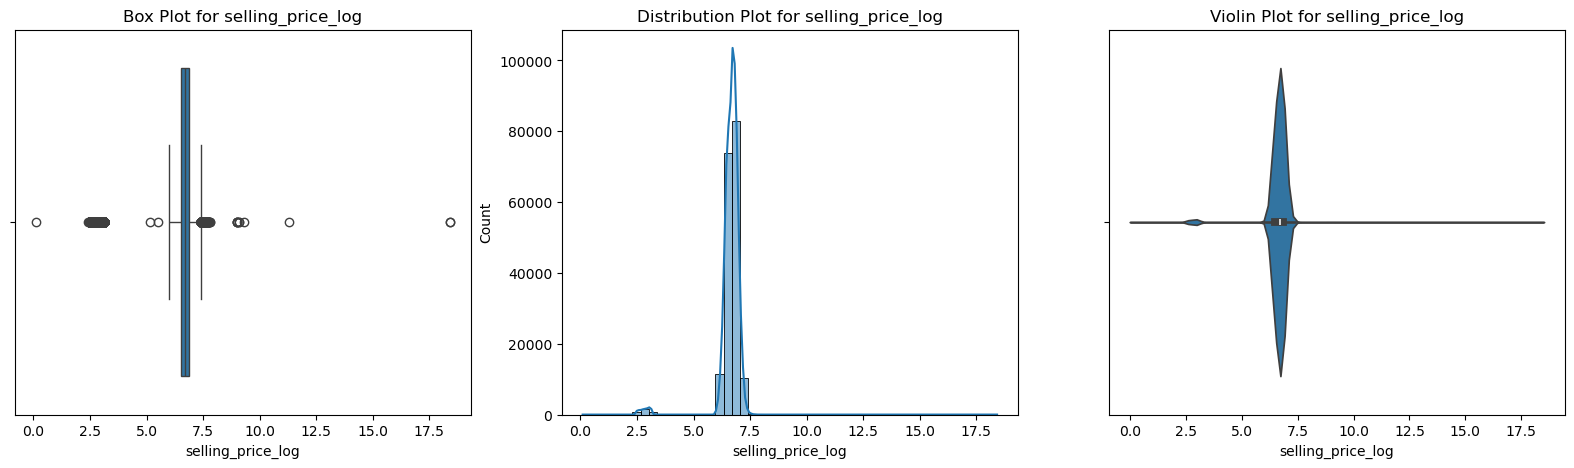

In [23]:
# Log Transformed Distribution of Skewed Feature
columns_to_plot = ['quantity_tons_log', 'thickness_log', 'selling_price_log']
for column in columns_to_plot:
    plot(df_new, column)

In [24]:
# Compare skewness before and after transformation
original_skewness_qt = df_new['quantity tons'].skew()
transformed_skewness_qt = df_new['quantity_tons_log'].skew()

original_skewness_t = df_new['thickness'].skew()
transformed_skewness_t = df_new['thickness_log'].skew()

original_skewness_sp = df_new['selling_price'].skew()
transformed_skewness_sp = df_new['selling_price_log'].skew()

print(f'Original Skewness QT: {original_skewness_qt}')
print(f'Transformed Skewness: {transformed_skewness_qt}')

print(f'Original Skewness Thickness: {original_skewness_t}')
print(f'Transformed Skewness: {transformed_skewness_t}')

print(f'Original Skewness SP: {original_skewness_sp}')
print(f'Transformed Skewness: {transformed_skewness_sp}')

Original Skewness QT: 424.6908163576334
Transformed Skewness: 0.3395680781943698
Original Skewness Thickness: 303.44763427639543
Transformed Skewness: 0.8624835988395646
Original Skewness SP: 301.38808794154323
Transformed Skewness: -5.274611647876985


In [25]:
#Handle outliers using InterQuartile Range
df1 = df_new.copy()
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,0.672944,6.383507
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,0.667829,6.380123
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,0.536493,6.429719
181671,2020-07-02,5875.066247,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,8.678643,0.615186,6.400257


In [26]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [27]:
#Function to treat outliers
def outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column]= df[column].clip(lower_bound, upper_bound)

In [28]:
outlier_columns= ['quantity_tons_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df1,i)

In [29]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574


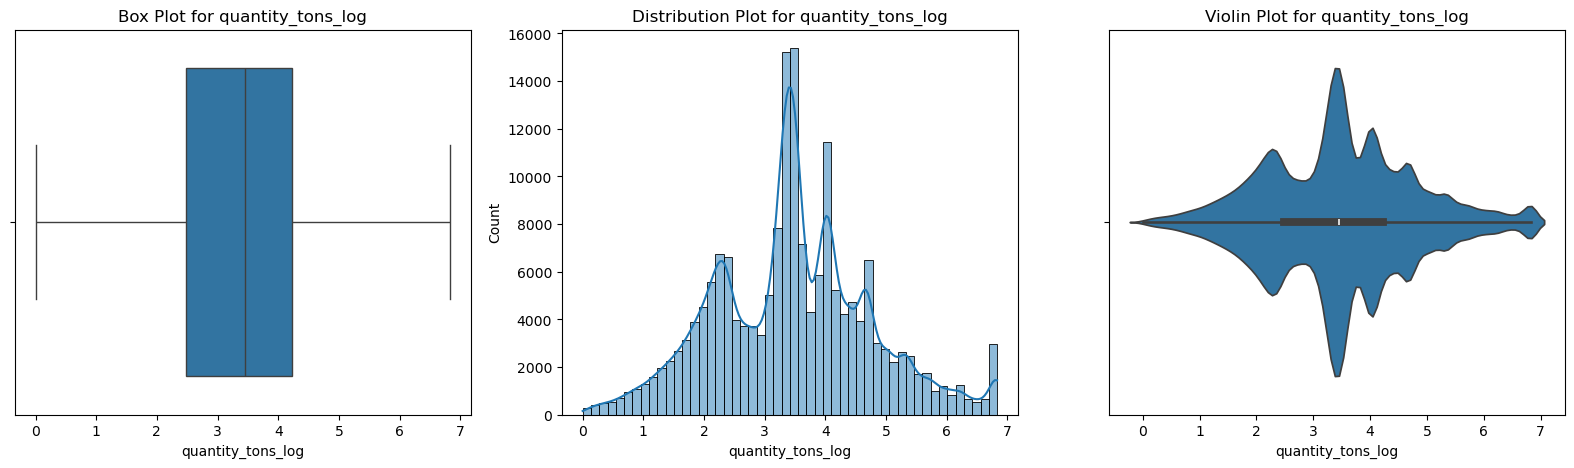

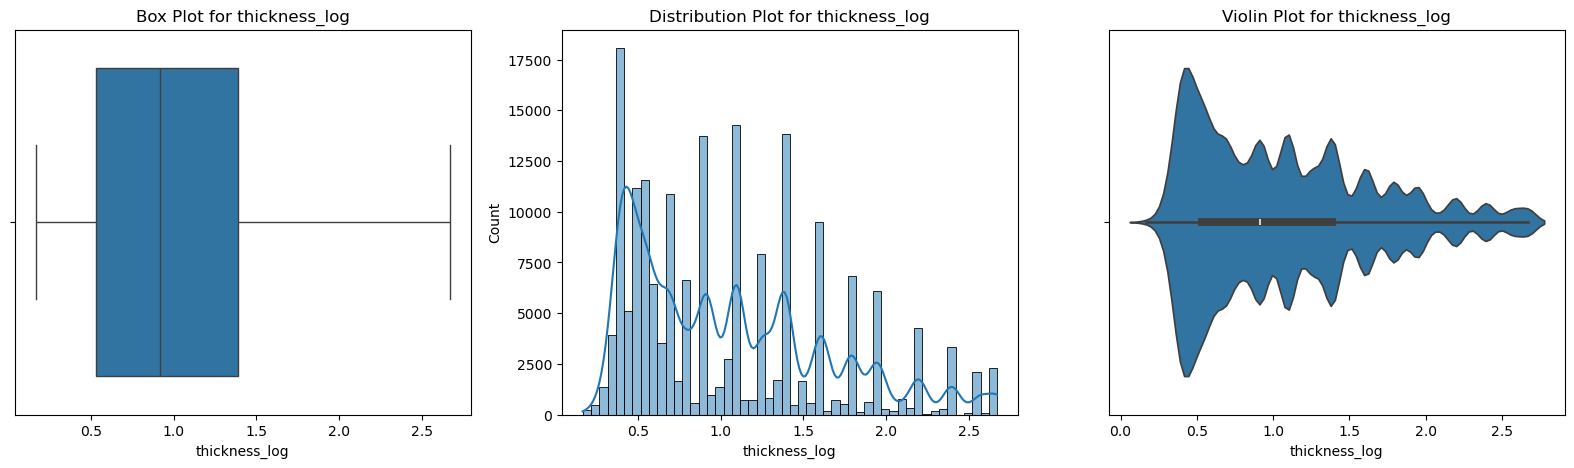

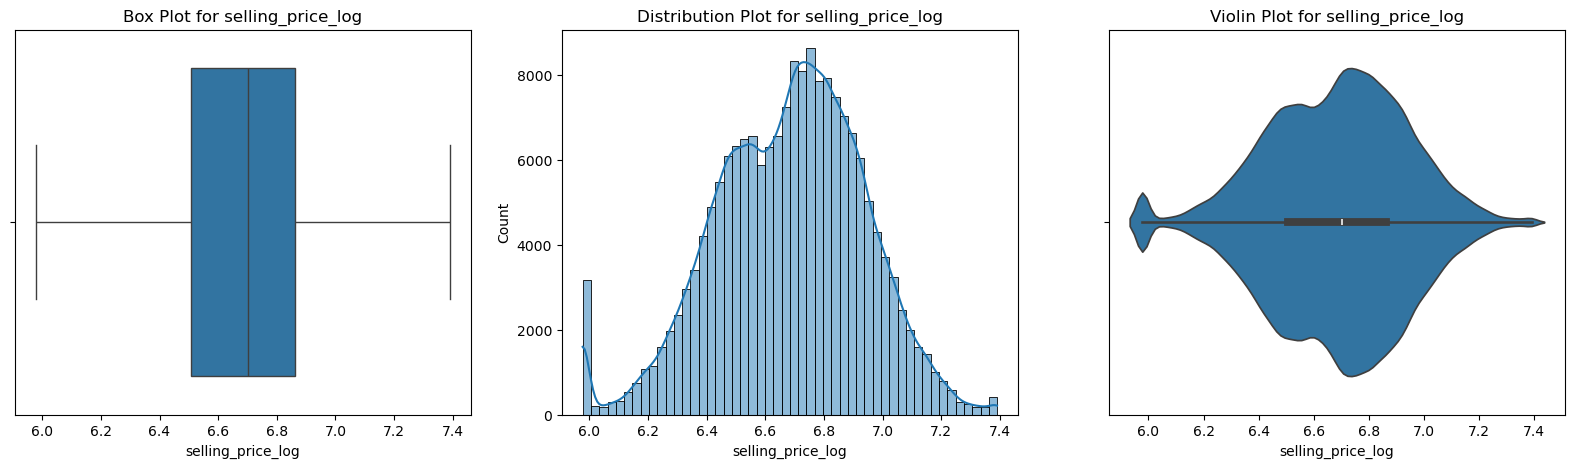

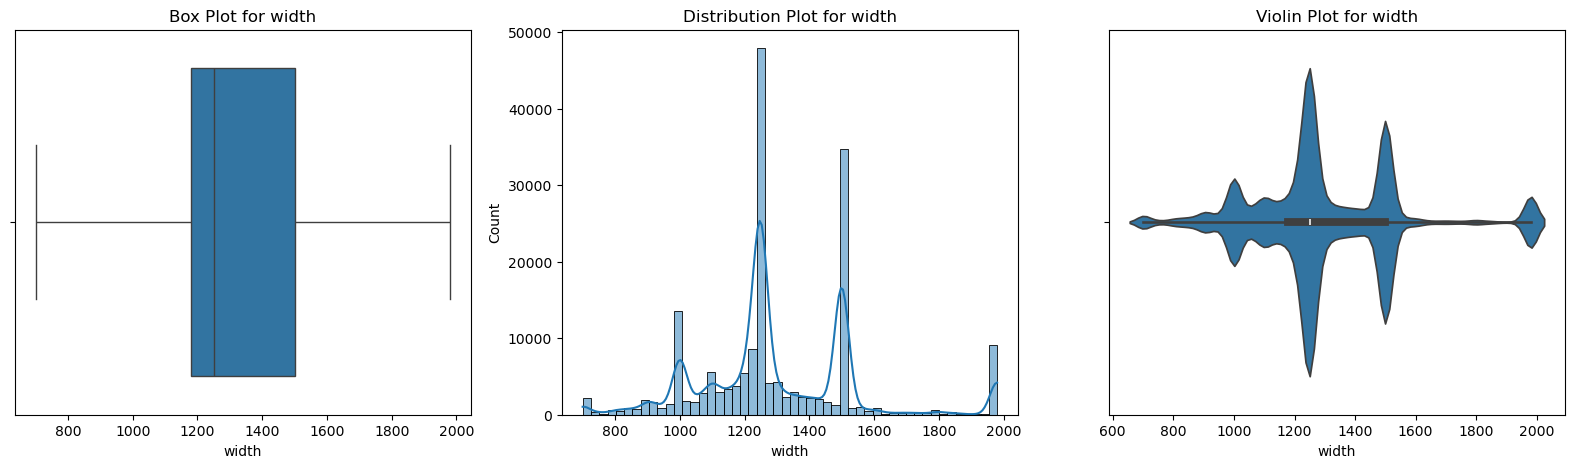

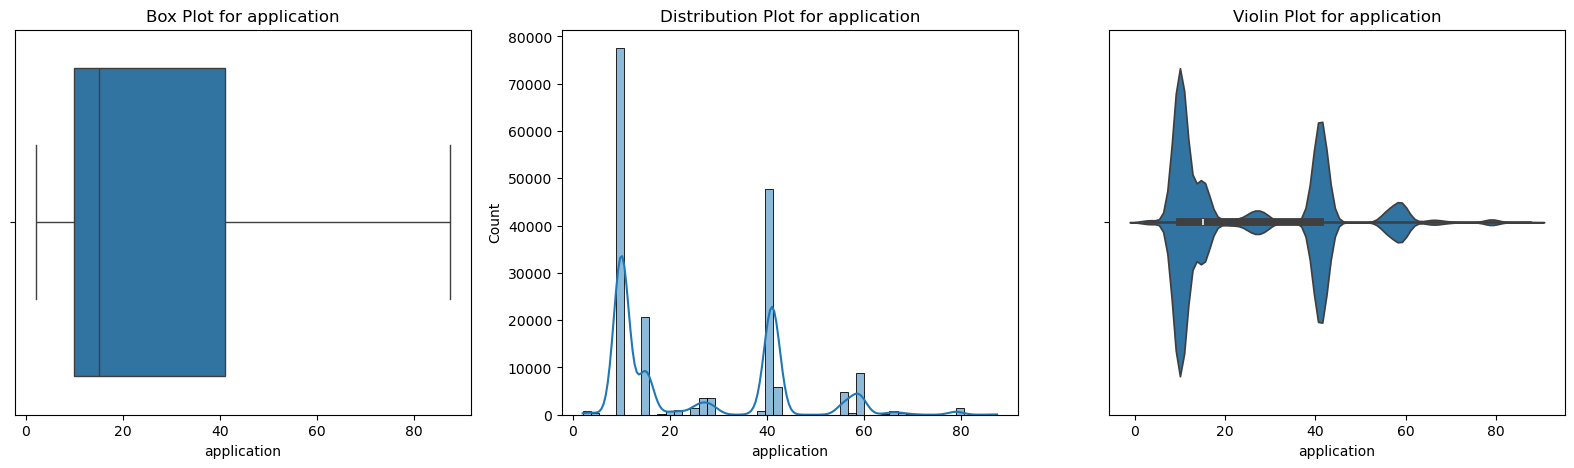

In [30]:
for i in ['quantity_tons_log', 'thickness_log', 'selling_price_log', 'width', 'application']:
    plot(df1, i)

### Regression model to predict continuous variable - "Selling_price"

In [74]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score # type: ignore

In [75]:
df_rg = df1.copy()
df_rg.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574


In [76]:
df_rg.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
count,181673,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673,1.816730e+05,181673.000000,181673.000000,181673.000000
mean,2020-11-26 22:56:58.127374080,5.875066e+03,3.051221e+07,44.893022,25.606567,2.564827,1297.045583,4.739679e+08,2021-01-25 22:44:26.223372288,1.918124e+03,3.465954,1.054781,6.682105
min,2020-07-02 00:00:00,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,700.000000,6.117280e+05,2019-04-01 00:00:00,1.000000e-01,0.000010,0.165514,5.977199
25%,2020-09-29 00:00:00,1.097167e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02,2.482543,0.530628,6.507278
50%,2020-11-30 00:00:00,3.036556e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02,3.445710,0.916291,6.700731
75%,2021-02-03 00:00:00,6.716871e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02,4.221986,1.386294,6.860664
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,87.500000,2500.000000,1980.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08,6.831150,2.669794,7.390743
std,NaN,2.349075e+06,2.433375e+07,24.402334,17.717755,6.572303,248.961933,7.175101e+08,NaN,3.317947e+05,1.302612,0.594742,0.255097


In [77]:
#Convert categorical variables using OneHotEncoding - 'status' & 'item type'
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df_rg[['status', 'item type']])

# Convert the result back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['status', 'item type']))

# Concatenate with the original DataFrame
df_rg = pd.concat([df_rg, encoded_df], axis=1)

df_rg.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,...,status_To be approved,status_Won,status_Wonderful,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
encoded_df

,status_Draft,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
df_rg.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log', 'thickness_log',
       'selling_price_log', 'status_Draft', 'status_Lost',
       'status_Not lost for AM', 'status_Offerable', 'status_Offered',
       'status_Revised', 'status_To be approved', 'status_Won',
       'status_Wonderful', 'item type_IPL', 'item type_Others', 'item type_PL',
       'item type_S', 'item type_SLAWR', 'item type_W', 'item type_WI'],
      dtype='object')

In [80]:
# Define the features (X) by dropping columns 'status', 'item type', and 'selling_price_log'
X = df_rg.drop(columns=['item_date','quantity tons','status', 'item type', 'thickness', 'delivery date', 'selling_price', 'selling_price_log'])
y = df_rg['selling_price_log']

In [81]:
X

,customer,country,application,width,product_ref,quantity_tons_log,thickness_log,status_Draft,status_Lost,status_Not lost for AM,...,status_To be approved,status_Won,status_Wonderful,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,30156308.0,28.0,10.0,1500.0,1670798778,4.010077,1.098612,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,30202938.0,25.0,41.0,1210.0,1668701718,6.645123,0.587787,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30153963.0,30.0,28.0,952.0,628377,5.958755,0.322083,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30349574.0,32.0,59.0,1317.0,1668701718,5.315229,1.193922,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,30211560.0,28.0,10.0,1980.0,640665,6.667626,1.609438,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,41.0,1220.0,164141591,4.639402,0.672944,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181669,30200854.0,25.0,41.0,1500.0,164141591,5.342748,0.667829,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181670,30200854.0,25.0,41.0,1250.0,164141591,1.655480,0.536493,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
181671,30200854.0,25.0,41.0,1250.0,164141591,6.831150,0.615186,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


In [84]:
X_train_scaled

array([[-0.00832899,  1.35654035, -0.88107854, ...,  0.        ,
         0.8497142 , -0.05338305],
       [-0.01522963, -0.69225061, -0.88107854, ...,  0.        ,
         0.8497142 , -0.05338305],
       [-0.01310842, -0.69225061, -0.88107854, ...,  0.        ,
         0.8497142 , -0.05338305],
       ...,
       [-0.00607291,  1.35654035, -0.88107854, ...,  0.        ,
         0.8497142 , -0.05338305],
       [-0.01358014, -0.73322643, -0.88107854, ...,  0.        ,
        -1.1768663 , -0.05338305],
       [-0.00596484,  1.35654035, -0.88107854, ...,  0.        ,
        -1.1768663 , -0.05338305]])

In [85]:
y

0         6.751101
1         6.954639
2         6.469762
3         6.645091
4         6.359574
            ...   
181668    6.383507
181669    6.380123
181670    6.429719
181671    6.400257
181672    6.410175
Name: selling_price_log, Length: 181673, dtype: float64

### Linear Regressor

In [86]:
from sklearn.linear_model import LinearRegression
#Train the Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Make Predictions
y_pred = model.predict(X_test_scaled)

#Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Linear Regression:
Mean Squared Error: 2.912588052047063e+19
R-squared: -4.496708172222805e+20


### XGBoost Algorithm for Regression

In [87]:
from xgboost import XGBRegressor # type: ignore
# Train and evaluate XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model using metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R2) Score: {r2_xgb:.2f}")

XGBoost Regressor:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.65


### ExtraTree Regression Algorithm

In [88]:
from sklearn.ensemble import ExtraTreesRegressor # type: ignore
# Train and evaluate Extra Trees Regressor
et_model = ExtraTreesRegressor()
et_model.fit(X_train_scaled, y_train)
y_pred_et = et_model.predict(X_test_scaled)

# Evaluate the Extra Trees model using metrics
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print("Extra Trees Regressor:")
print(f"Mean Squared Error (MSE): {mse_et:.2f}")
print(f"R-squared (R2) Score: {r2_et:.2f}")

Extra Trees Regressor:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.65


### Decision tree Regressor

In [89]:
#Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor # type: ignore

# Define the model
model_dt = DecisionTreeRegressor()

# Train the model
model_dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2) Score: {r2_dt:.2f}")

Decision Tree Regressor Model:
Mean Squared Error (MSE): 0.03
R-squared (R2) Score: 0.52


### Random Forest Regressor

In [90]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor # type: ignore 

# Define the model
model_rf = RandomForestRegressor()

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.71


### Hyperparameter tuning

In [91]:
# selecting RandomForestRegressor as my model for further tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor model
model_rf = RandomForestRegressor()

# Define the hyperparameters grid to search over
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'n_jobs': [-1]  # Utilize all available CPU cores
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)

# Perform the grid search on your training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = best_model.score(X_test_scaled, y_test)

print("Best Model Performance:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"R-squared (R2) Score: {r2_best:.2f}")


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1}
Best Model Performance:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.71


### Testing on new data - Predicting Selling price

In [92]:
# Example new data
new_data = pd.DataFrame({
    'customer': ['30223403.0'],
    'country': ['78.0'],
    'status': ['Draft'],
    'item type': ['S'],
    'application': ['99.0'],
    'width': [1500],
    'product_ref': ['1668701718'],
    'quantity_tons_log': [2.274061],
    'thickness_log': [0.693147],  
})

# Use the fitted encoder to transform the categorical features in the new data
encoded_new_data = encoder.transform(new_data[['status', 'item type']])
encoded_new_df = pd.DataFrame(encoded_new_data, columns=encoder.get_feature_names_out(['status', 'item type']))

# Concatenate the encoded features with the new data
new_data_encoded = pd.concat([new_data.reset_index(drop=True), encoded_new_df.reset_index(drop=True)], axis=1)
new_data_encoded = new_data_encoded.drop(columns=['status', 'item type'])

# Apply the fitted scaler to all columns of the new data
scaled_new_data = scaler.transform(new_data_encoded)
new_data_scaled = pd.DataFrame(scaled_new_data, columns=new_data_encoded.columns)

# Ensure the order of columns matches the training data
final_columns = new_data_encoded.columns  # Ensure this matches the order used during training
new_data_final = new_data_scaled[final_columns]

# Make predictions using the trained model
y_pred_new = best_model.predict(new_data_final)

# Print the predictions for the new data
print("Predictions for New Data:")
print(f"Predicted Selling Price: {np.exp(y_pred_new)}")

Predictions for New Data:
Predicted Selling Price: [411.25919459]


#### Saving the model

In [93]:
import pickle

# Save the trained model to a file
with open("C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Regression_Models\\model_rf.pkl", 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler
with open("C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Regression_Models\\scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

# Save the encoder
with open("C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Regression_Models\\encoder.pkl", 'wb') as file:
    pickle.dump(encoder, file)


## Classification Model to predict "status"

In [98]:
df_cl = df1.copy()
df_cl

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,4.010077,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.645123,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,4.639402,0.672944,6.383507
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,5.342748,0.667829,6.380123
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1.655480,0.536493,6.429719
181671,2020-07-02,5875.066247,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,6.831150,0.615186,6.400257


In [99]:
df_cl = df_cl[df_cl['status'].isin(['Won', 'Lost'])]
len(df_cl)

150450

In [100]:
df_cl.isnull().sum()

item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
delivery date        0
selling_price        0
quantity_tons_log    0
thickness_log        0
selling_price_log    0
dtype: int64

In [101]:
df_cl.dtypes

item_date            datetime64[ns]
quantity tons               float64
customer                    float64
country                     float64
status                       object
item type                    object
application                 float64
thickness                   float64
width                       float64
product_ref                   int64
delivery date        datetime64[ns]
selling_price               float64
quantity_tons_log           float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [102]:
df_cl.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,thickness_log,selling_price_log
count,150450,150450.000000,1.504500e+05,150450.000000,150450.000000,150450.000000,150450.000000,1.504500e+05,150450,150450.000000,150450.000000,150450.000000,150450.000000
mean,2020-11-27 03:43:42.504847616,94.627498,3.027510e+07,45.390831,25.186353,2.618333,1299.795065,4.748337e+08,2021-01-23 17:51:08.446211328,825.853388,3.447589,1.069053,6.688157
min,2020-07-02 00:00:00,0.000010,1.245800e+04,25.000000,2.000000,0.180000,700.000000,6.117280e+05,2019-04-01 00:00:00,0.100000,0.000010,0.165514,5.977199
25%,2020-09-29 00:00:00,10.700152,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,2020-10-01 00:00:00,671.000000,2.459602,0.553885,6.510258
50%,2020-12-01 00:00:00,29.935826,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,811.000000,3.431915,0.916291,6.699500
75%,2021-02-03 00:00:00,64.875089,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,951.120000,4.187760,1.386294,6.858691
max,2021-04-01 00:00:00,70252.363070,2.147484e+09,113.000000,87.500000,2500.000000,1980.000000,1.722208e+09,2022-01-01 00:00:00,81236.140000,6.831150,2.669794,7.390743
std,NaN,441.915961,9.454989e+06,24.487798,17.607020,7.115405,252.917066,7.172603e+08,NaN,290.844292,1.300762,0.595778,0.238537


In [103]:
# Mapping 'Won' to 1 and 'Lost' to 0
df_cl['status'] = df_cl['status'].map({'Won': 1, 'Lost': 0})
df_cl['status']

0         1
1         1
2         1
3         1
4         1
         ..
181668    1
181669    1
181670    1
181671    1
181672    1
Name: status, Length: 150450, dtype: int64

In [104]:
#Feature selection
X = df_cl[['customer', 'country', 'item type', 'application', 'width', 'product_ref',  'quantity_tons_log', 'thickness_log', 'selling_price_log']]
y = df_cl['status']

In [105]:
X

,customer,country,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,W,10.0,1500.0,1670798778,4.010077,1.098612,6.751101
1,30202938.0,25.0,W,41.0,1210.0,1668701718,6.645123,0.587787,6.954639
2,30153963.0,30.0,WI,28.0,952.0,628377,5.958755,0.322083,6.469762
3,30349574.0,32.0,S,59.0,1317.0,1668701718,5.315229,1.193922,6.645091
4,30211560.0,28.0,W,10.0,1980.0,640665,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,W,41.0,1220.0,164141591,4.639402,0.672944,6.383507
181669,30200854.0,25.0,W,41.0,1500.0,164141591,5.342748,0.667829,6.380123
181670,30200854.0,25.0,W,41.0,1250.0,164141591,1.655480,0.536493,6.429719
181671,30200854.0,25.0,W,41.0,1250.0,164141591,6.831150,0.615186,6.400257


In [106]:
y

0         1
1         1
2         1
3         1
4         1
         ..
181668    1
181669    1
181670    1
181671    1
181672    1
Name: status, Length: 150450, dtype: int64

In [107]:
#Convert categorical variables using OneHotEncoding - 'item type'
from sklearn.preprocessing import OneHotEncoder
# Instantiate the OneHotEncoder 
ohe = OneHotEncoder(handle_unknown='ignore', categories='auto', sparse=False)
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']])


In [108]:
X_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [109]:
# concatenating independent features after encoding
X_new = np.concatenate((X[['customer', 'country', 'application', 'width', 'product_ref',  'quantity_tons_log', 'thickness_log', 'selling_price_log']].values, X_ohe), axis=1)


In [110]:
X_new.shape

(150450, 15)

In [111]:
from sklearn.model_selection import train_test_split
#split dataset to train & test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [112]:
X_train.shape

(105315, 15)

In [113]:
X_test.shape

(45135, 15)

In [114]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
won_rows = df_cl[df_cl['status'] == 1]
len(won_rows)

116012

In [116]:
lost_rows = df_cl[df_cl['status'] == 0]
len(lost_rows)

34438

#### Handling Class imbalance

In [117]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [153]:
X_train_res.shape, y_train_res.shape

((162692, 15), (162692,))

In [155]:
X_test.shape, y_test.shape

((45135, 15), (45135,))

### Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_res, y_train_res)
y_pred = dtc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9095158967541819
Precision: 0.9113913547169569
Recall: 0.93336410315583
F1 Score: 0.9406360834932264
AUC Score: 0.8819557166844199
Confusion Matrix:
[[ 8695  1774]
 [ 2310 32356]]


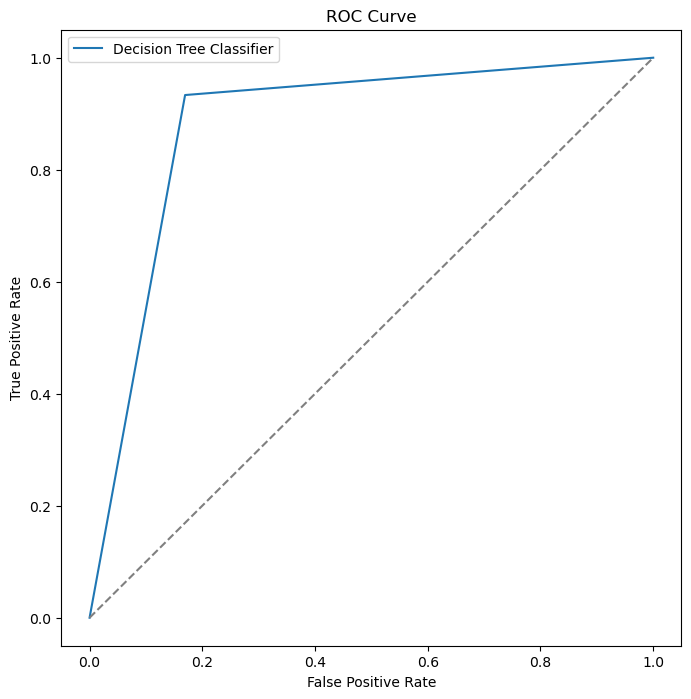

In [121]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## ExtraTrees Classifier

In [122]:
from sklearn.ensemble import ExtraTreesClassifier

# Create and train ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(X_train_res, y_train_res)

# Predictions on the test set
y_pred_extra_trees = extra_trees_model.predict(X_test_scaled)

# Evaluate ExtraTreesClassifier
print("Extra Trees Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_extra_trees))
print("Precision:", precision_score(y_test, y_pred_extra_trees, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_extra_trees))
print("F1 Score:", f1_score(y_test, y_pred_extra_trees))
print("AUC Score:", roc_auc_score(y_test, y_pred_extra_trees))

cm = confusion_matrix(y_test, y_pred_extra_trees)
print(f"Confusion Matrix:\n{cm}")


Extra Trees Classifier Metrics:
Accuracy: 0.923695579926886
Precision: 0.9241336049602553
Recall: 0.9479893844112387
F1 Score: 0.9502096284516409
AUC Score: 0.8956204444264618
Confusion Matrix:
[[ 8828  1641]
 [ 1803 32863]]


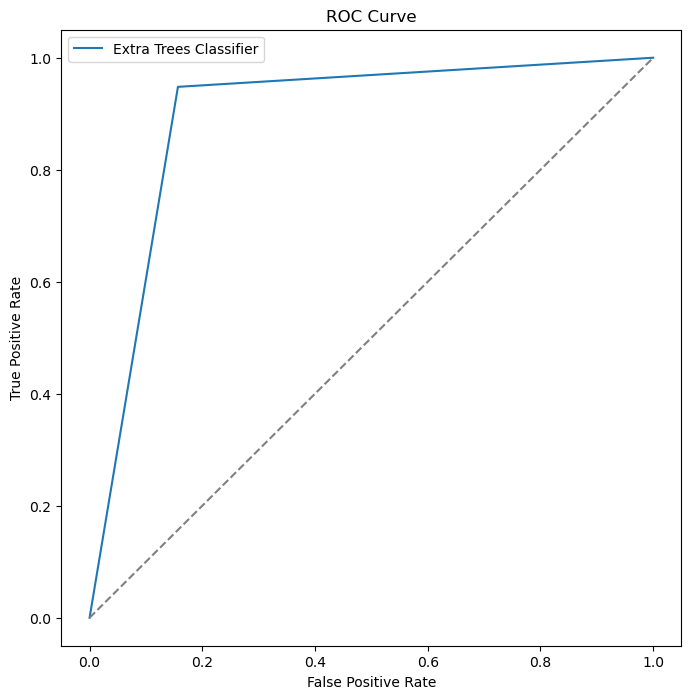

In [123]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_extra_trees)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='Extra Trees Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [124]:
from xgboost import XGBClassifier

# Create and train XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBClassifier
print("XGB Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
print(f"Confusion Matrix:\n{cm}")

XGB Classifier Metrics:
Accuracy: 0.87984934086629
Precision: 0.943223498742005
Recall: 0.8975941845035481
F1 Score: 0.919843322740374
AUC Score: 0.8593425120626442
Confusion Matrix:
[[ 8596  1873]
 [ 3550 31116]]


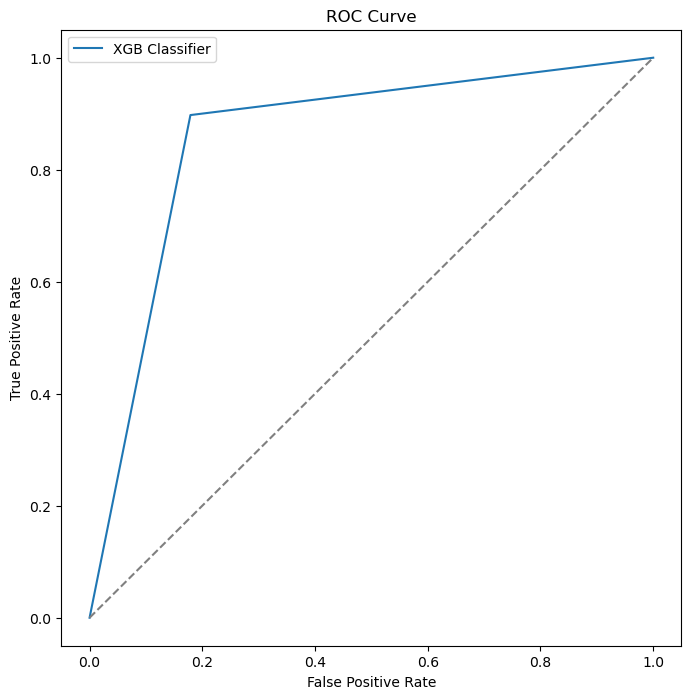

In [125]:

# Plot ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, label='XGB Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [126]:
from sklearn.linear_model import LogisticRegression # type: ignore 

# Create and train Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_res, y_train_res)

# Predictions on the test set
y_pred_logistic_regression = logistic_regression_model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred_logistic_regression)
precision = precision_score(y_test, y_pred_logistic_regression, average='weighted')
recall = recall_score(y_test, y_pred_logistic_regression, average='weighted')
f1 = f1_score(y_test, y_pred_logistic_regression, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_logistic_regression)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("AUC Score:", roc_auc_score(y_test, y_pred_logistic_regression))
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.6987703555998671
Precision: 0.7785895857576742
Recall: 0.6987703555998671
F1 Score: 0.7203109419438567
AUC Score: 0.7035566104215276
Confusion Matrix:
[[ 7459  3010]
 [10586 24080]]


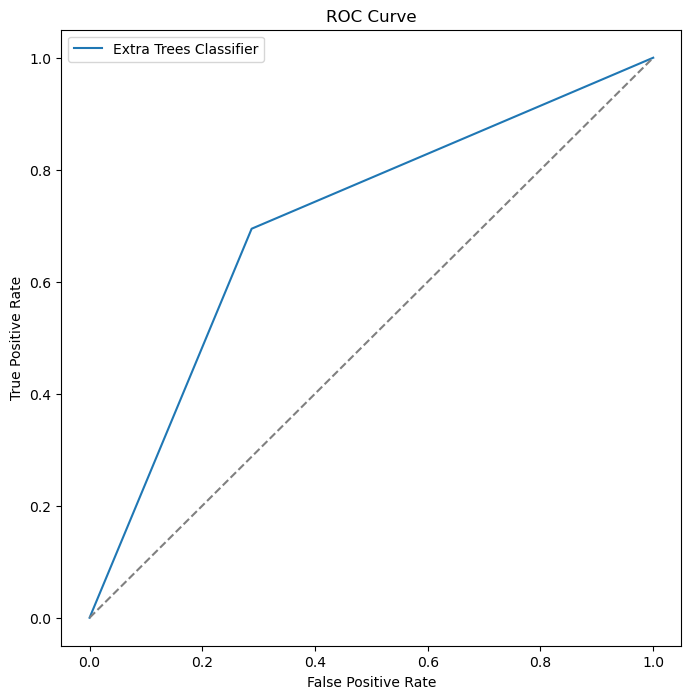

In [127]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic_regression)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='Extra Trees Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

In [129]:
# Define the model
model = ExtraTreesClassifier()

In [130]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [131]:
# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy on training set:", grid_search.best_score_)

# the best model from the grid search
best_etc_model = grid_search.best_estimator_

# Predict using the best model on the test set
y_pred_etc = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model's performance (if needed)
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print("Accuracy on Test Data:", accuracy_etc)

# print a classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_etc))


Best Hyperparameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on training set: 0.9565315168750883
Accuracy on Test Data: 0.9248476791846683
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10469
           1       0.95      0.95      0.95     34666

    accuracy                           0.92     45135
   macro avg       0.89      0.90      0.90     45135
weighted avg       0.93      0.92      0.93     45135



### Testing on new data - Predicting Status

In [147]:
# Example new data
new_data = pd.DataFrame({
    'customer': ['30165992.0'],
    'country': ['77.0'],
    'item type': ['S'],
    'application': ['10.0'],
    'width': [1500],
    'product_ref': ['164141591'],
    'quantity_tons_log': [2.274061],
    'thickness_log': [0.693147],  
    'selling_price_log': [7.134094]
})

#  Use the fitted encoder to transform the categorical features in the new data
encoded_input_features = ohe.transform(new_data[['item type']])
encoded_input_df = pd.DataFrame(encoded_input_features, columns=ohe.get_feature_names_out(['item type']))

# Concatenate the encoded features with the new data
input_features_encoded = pd.concat([new_data.reset_index(drop=True), encoded_input_df.reset_index(drop=True)], axis=1)
input_features_encoded = input_features_encoded.drop(columns=['item type'])

# Apply the fitted scaler to all columns of the new data
scaled_input_features = scaler.transform(input_features_encoded)
input_features_scaled = pd.DataFrame(scaled_input_features, columns=input_features_encoded.columns)

# Ensure the order of columns matches the training data
final_columns = input_features_encoded.columns  # Ensure this matches the order used during training
input_features_final = input_features_scaled[final_columns]

# Make predictions using the trained model
y_pred_status = best_etc_model.predict(input_features_final)

if y_pred_status == 1:
    print('The Status is Won')
else:
    print('The Status is Lost')



The Status is Lost


In [150]:
y_pred_status

array([0], dtype=int64)

In [151]:
import pickle
# Save the model using pickle
with open('C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Classification_Models\\et_best_classifier.pkl', 'wb') as file:
    pickle.dump(best_etc_model, file)

# Save the encoders and scaler as well
with open('C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Classification_Models\\one_hot_encoder_classifier.pkl', 'wb') as file:
    pickle.dump(ohe, file)

with open('C:\\Users\\Raghu\\OneDrive\\Desktop\\Capstone_Projects\\Industrial_Copper_Modelling_Project\\Classification_Models\\standard_scaler_classifier.pkl', 'wb') as file:
    pickle.dump(scaler, file)
